In [ ]:
from read_and_clean_documents import *
from text_processing import *
from clustering_functions import *
from plot import *
import pandas as pd


DATA_FOLDER = "../data/"
HTML_DATA_FOLDER = "test.csv"




In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

In [1]:
import glob
import re
from html.parser import HTMLParser
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.stem.porter import PorterStemmer

def get_cleaned_html_documents(folder_file_list):
    """
    Reads the files in folders
    Returns a list of list containing cleaned words/data in the html files

    Param_1: Output of get_file_names, list of folders and file names
    Output_1: List of lists containing string, which are words in the html
    """
    html_parser = HTMLParser()
    cleaned_documents = []
    for item in folder_file_list:
        for file_name in item[1]:
            f = open(file_name, "r")  # Open the file
            x = f.read()  # Read file
            html_parser.feed(x)  # Feed the file to get rid of html elements
            f.close()  # Close the file
        plain_html_file = html_parser.html_plain_document  # Get the list of words
        cleaned_html_file = clean_list(plain_html_file)  # Clean the list
        cleaned_documents.append(cleaned_html_file)
        html_parser.html_plain_document = []  # Empty the html document
    return cleaned_documents

In [6]:
import glob
import re
from html.parser import HTMLParser
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.stem.porter import PorterStemmer

class MyHTMLParser(HTMLParser):  # To parse html files
    html_plain_document = []
    def handle_data(self, data):  # For every html data
        self.html_plain_document.append(data)  # Append the data to the list

def clean_list(list_to_clean):
    """
    Function to clean a list
    Removes any non-alphanumeric characters
    Stems words
    Gets rid of any empty elements in the list

    Param_1: List, containing strings
    Output_1: List, containing cleaned strings
    """
    # remove stemer for reuse
    stemmer = PorterStemmer()
    items_to_clean = set(list(stopwords.words('english')) + ['\n','\n\n','\n\n\n','\n\n\n\n','ocroutput','',' '])
    # Items to clean
    cleaned_list = []
    regex_non_alphanumeric = re.compile('[^0-9a-zA-Z]')  # REGEX for non alphanumeric chars
    abstract_words = []
    for sentence in list_to_clean:
            words = sentence.split()
            word_list = []
            for index,item in enumerate(words):
                word_list.append(item)
                item = regex_non_alphanumeric.sub('', item)  # Filter text, remove non alphanumeric chars
                item = item.lower()  # Lowercase the text
                #stemerrrr remove
                item = stemmer.stem(item)  # Stem the text
                if len(item) < 3:  # If the length of item is lower than 3, remove item
                    item = ''
                word_list[index] = item  # Put item back to the list
            cleaned_sentence = [elem for elem in word_list if elem not in items_to_clean]
            abstract_words = abstract_words + cleaned_sentence
    
                

    return abstract_words

def to_sentence(string):
        words = []
        for i in string:
            
               #string = ', '.join(i)
            m = re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', i)
            for i in m:
                words.append(i)
              
        return words

In [18]:
from app.search_class import Search
from csv_parser import Csv_Parser
bio = Search()
csv = Csv_Parser()
title, abstracts = bio.query("MMP-13 inhibitor", '30')


for abstract in abstracts:
    sentence = to_sentence(abstract[0])
    
    clean = clean_list(sentence)
    write_list_to_file('test3.txt', clean)
   


# r = clean_list(testii)

In [5]:
def write_list_to_file(file_name, content):
    f = open(file_name, 'a')
    for item in content:
        
      
        f.write(str(item))
        f.write(' ')
    f.write('\n')
    f.close()


['matrix',
 'metalloproteinase13',
 'mmp13',
 'member',
 'collagenas',
 'famili',
 'enzym',
 'implic',
 'play',
 'key',
 'role',
 'patholog',
 'osteoarthr',
 'recent',
 'report',
 'discoveri',
 'seri',
 'quinazoline2carboxamid',
 'base',
 'nonzincbind',
 'mmp13',
 'select',
 'inhibitor',
 'exemplifi',
 'compound',
 'continu',
 'research',
 'novel',
 'class',
 'zincbind',
 'inhibitor',
 'obtain',
 'followup',
 'compound',
 'differ',
 'physicochem',
 'pharmacokinet',
 'biolog',
 'activ',
 'profil',
 'order',
 'design',
 'select',
 'mmp13',
 'inhibitor',
 'adopt',
 'strategi',
 'connect',
 'zincbind',
 'group',
 'quinazoline2carboxamid',
 'system',
 'uniqu',
 'binder',
 'appropri',
 'linker',
 'among',
 'synthes',
 'compound',
 'triazolon',
 'inhibitor',
 'exhibit',
 'excel',
 'potenc',
 'icsub50sub0071nm',
 'select',
 'greater',
 '170fold',
 'mmp',
 'mmp1',
 'tumor',
 'necrosi',
 'factor',
 'convert',
 'enzym',
 'tace',
 'thi',
 'articl',
 'design',
 'synthesi',
 'biolog',
 'activ',
 'no

In [17]:
(cleaned_content_as_list, cleaned_content_as_str) = \
    read_from_cleaned_file('cleaned_content_2.txt')
frequent_words_removed_content_as_list = remove_frequent_items(cleaned_content_as_list, 75)
write_list_to_file('freq_words_removed_content_2.txt', frequent_words_removed_content)

#


In [9]:
directory = "./data/cleaned_data/"
def read_authors_book_names():
    with open(directory + 'authors.txt', "r") as f:
        authors = []
        for line in f:
            line_str = line.strip()
            authors.append(line_str)
    f.close()

    with open(directory + 'books.txt', "r") as f:
        books = []
        for line in f:
            line_str = line.strip()
            books.append(line_str)
    f.close()
    return (books, authors)
def read_from_cleaned_file(file_name):
    with open(file_name, "r") as f:
        content_as_list = []
        content_as_str = []
        for line in f:
            print(line)
            line_str = line.strip()
            line_list = line_str.split()
            content_as_list.append(line_list)
            content_as_str.append(line_str)
    f.close()
    return (content_as_list, content_as_str)

import ast
def read(file_name):
    places = []

    # open file and read the content in a list
    with open(file_name, 'r') as f:
        content_as_list = []
        content_as_str = []
        
        for line in f:
            line_str = line.strip()
            line_list = line_str.split()
            content_as_list.append(line_list)
            content_as_str.append(line_str)
    f.close()
    return (content_as_list, content_as_str)
def remove_frequent_items(book_word_list, percentage):
    """
    Remove frequently occured words

    Param_1: List of list containing strings
    Param_2: Above x percentage of occurance will be removed
    Output_1: Cleaned list
    """
    treshold = int(len(book_word_list) * percentage / 100)
    DF = defaultdict(int)
    for cleaned_list in book_word_list:
        for word in set(cleaned_list):
                DF[word] += 1
    words_to_remove = {k:v for k,v in DF.items() if v > treshold }
    # A new dictionary of items that only has count above treshold
    words_to_remove_as_list = set(words_to_remove.keys())
    freq_items_removed_book_word_list = []
    for book in book_word_list:
        freq_items_removed_list = [word for word in book if word not in words_to_remove_as_list]
        freq_items_removed_book_word_list.append(freq_items_removed_list)
    return freq_items_removed_book_word_list

In [10]:
def get_similarity_matrix(content_as_str):
    tfidf_vectorizer = TfidfVectorizer(max_df=.8, max_features=200000, min_df=.2,
                                       stop_words='english',use_idf=True,
                                       tokenizer=tokenize_and_stem, ngram_range=(1,3))
    tfidf_matrix = tfidf_vectorizer.fit_transform(content_as_str) #fit the vectorizer to synopses
    similarity_matrix = cosine_similarity(tfidf_matrix)
    return (similarity_matrix, tfidf_matrix)

In [217]:

from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.", "The dog.", "The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
(1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


In [19]:


(frequent_words_removed_content_as_list, frequent_words_removed_content_as_str) = \
    read_from_cleaned_file('test3.txt')
(book_names, authors) = read_authors_book_names()



cartilag regener requir balanc anabol catabol process examin suscept fibromodulin fmod lumican lum degrad mmp13 adamts4 adamts5 three major degrad proteinas articular cartilag cartilag develop osteoarthr immunoloc fmod lum fetal foot adult knee cartilag use fmod matrix metalloproteas mmp13 neoepitop antibodi tsyg11 ctermin antifmod pr184 antilum pr353 antibodi vitro digest knee cartilag mmp13 disintegrin metalloproteas thrompospondin motif adamts4 adamts5 assess whether fmod lum fragment observ western blot total knee replac specimen could gener normal ovin articular cartilag explant cultur interleukin il1 oncostatinm osm pge3162689 broad spectrum mmp inhibitor assess fmod lum collagen degrad fmod lum immunoloc metatars phalang fetal rudiment cartilag growth plate antibodi tsyg11 local mmp13cleav fmod hypertroph chondrocyt metatars growth plate fmod promin local superfici cartilag normal fibril zone cartilag tsyg11posit fmod locat deep cartilag sampl tsyg11 identifi fmod fragment weste

IndexError: list index out of range

In [20]:

from src.text_processing import *
from src.clustering_functions import *
(similarity_matrix, tfidf_matrix) = get_similarity_matrix(frequent_words_removed_content_as_str)

# km_clusters = get_cluster_kmeans(tfidf_matrix, 3)  # KMeans
# x_pos, y_pos = pca_reduction(similarity_matrix, 10)
# scatter_clusters(x_pos, y_pos, km_clusters, authors) # Scatter K-means with PCA


/home/openpose/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [21]:
similarity_matrix.shape

(30, 30)

In [14]:

dbscan_clusters = get_dbscan_cluster(tfidf_matrix, 1.2)
dbscan_clusters = dbscan_clusters + 1  # DBScan clusters start from -1
x_pos, y_pos = multidim_scaling(similarity_matrix, 2)  # MultidimScaling
scatter_clusters(x_pos, y_pos, dbscan_clusters, authors) # Scatter K-means with PCA



NameError: name 'scatter_clusters' is not defined

In [ ]:
#dendogram(similarity_matrix, book_names)


In [22]:

lda_model = lda_topic_modeling(frequent_words_removed_content_as_list, 5)
print(lda_model.print_topics(num_topics=5, num_words=5))

[(0, '0.023*"express" + 0.023*"mmp13" + 0.016*"cartilag" + 0.013*"activ" + 0.013*"cell"'), (1, '0.029*"mmp13" + 0.022*"inhibitor" + 0.013*"model" + 0.009*"matrix" + 0.009*"activ"'), (2, '0.028*"mmp13" + 0.010*"periodont" + 0.010*"salubrin" + 0.010*"autophagi" + 0.010*"role"'), (3, '0.026*"mmp13" + 0.023*"express" + 0.014*"level" + 0.012*"group" + 0.012*"inhibitor"'), (4, '0.018*"left" + 0.016*"mmp8" + 0.016*"ventricular" + 0.013*"mmp13" + 0.013*"rat"')]


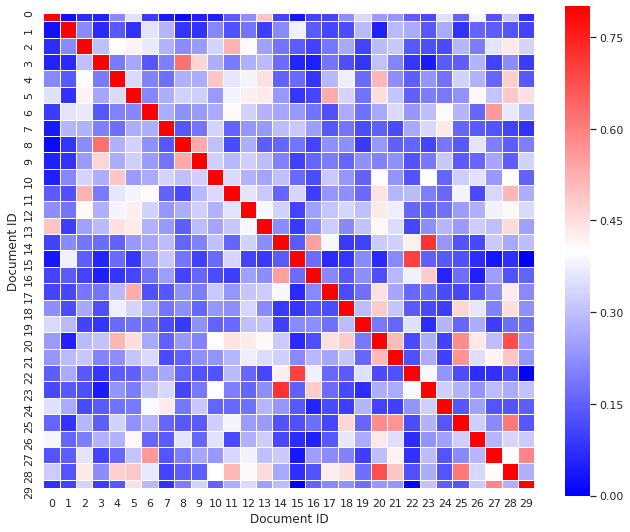

In [23]:
from string import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="white")
sns.set(font_scale=1)
mask = np.zeros_like(similarity_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
f, ax = plt.subplots(figsize=(11, 9))
b = similarity_matrix
c = sns.heatmap(b, mask=mask, cmap="bwr", vmax=.8,
            square=True, linewidths=0.01,  ax=ax)
c.set(xlabel='Document ID', ylabel='Document ID')
plt.show()
fig = c.get_figure()
fig.suptitle('TF-IDF Document Similarity Matrix', fontsize=25)

fig.savefig("output.png")